In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data =pd.read_csv('/content/Wine_clust .csv')

In [ ]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**DATA EXPLORATION AND PREPROCESSING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.isnull().sum()# checking for missing values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

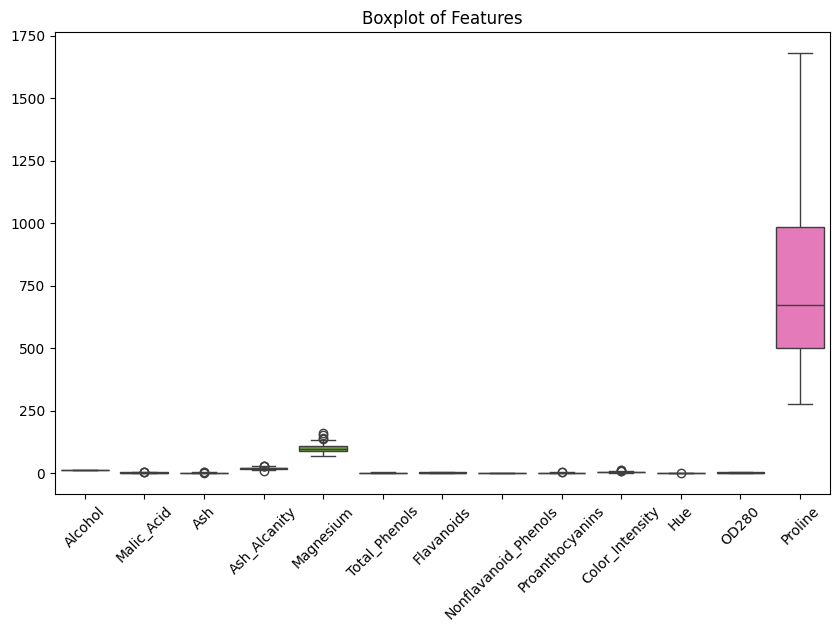

In [ ]:
# Box Plot for checking  outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

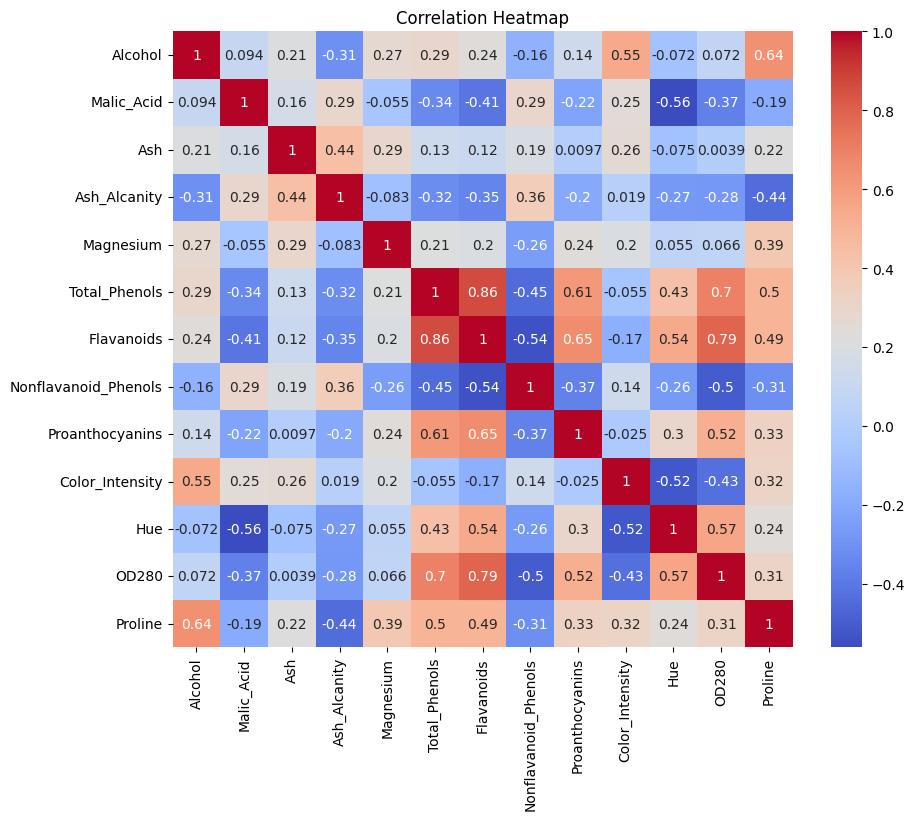

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_data = scaler.fit_transform(data)

In [ ]:
sc_data=pd.DataFrame(sc_data,columns=data.columns)
sc_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(sc_data)

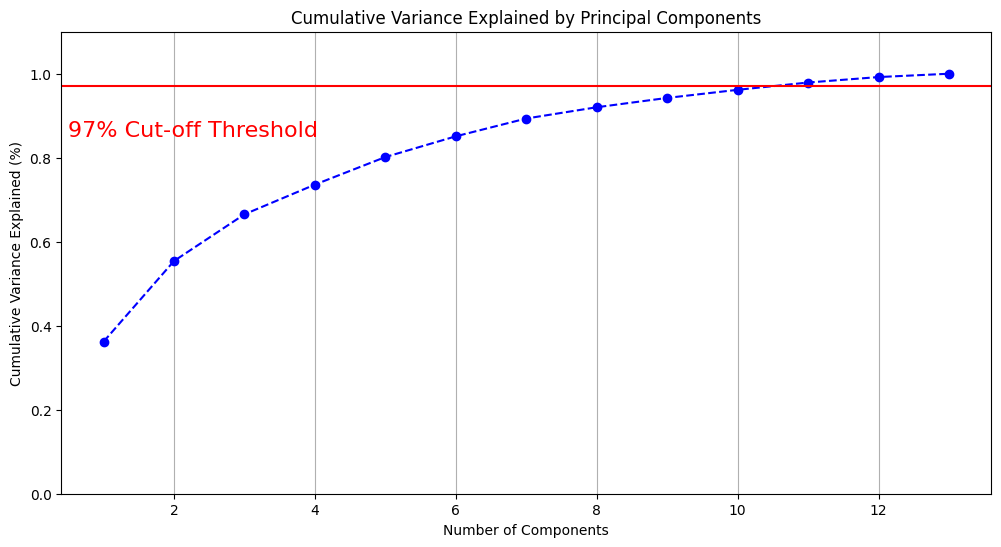

In [ ]:
# Plot cumulative explained variance ratio
plt.rcParams["figure.figsize"] = (12, 6)
fig, ax = plt.subplots()

xi = np.arange(1, len(data.columns) + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% Cut-off Threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
pca =PCA(n_components =10)
pca.fit(sc_data)
x_pca=pca.transform(sc_data)

In [ ]:
len(x_pca[0])

10

In [ ]:
x_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.51390947e-02,  6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.02441595e+00, -3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -3.44216131e-01, -1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         4.70238043e-02,  1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         3.90828774e-01,  5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.92913734e-01,  7.41660423e-01, -1.17969019e-01]])

**KMeans**

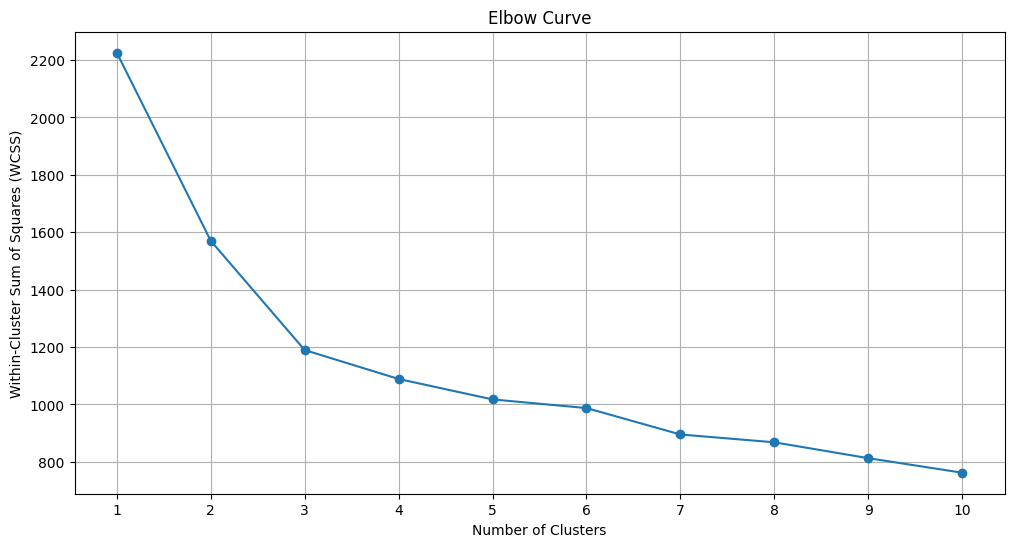

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)  # Set n_init explicitly
    y_kmeans=kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve for KMeans
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
y_kmeans

KMeans(n_clusters=10, n_init=10, random_state=42)

In [ ]:
# Define the range of cluster sizes to try
cluster_range = range(2, 11)
silhouette_scores = []

# Calculate silhouette score for each cluster size
for n_clusters in cluster_range:
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans_labels = kmeans_model.fit_predict(x_pca)
    silhouette_avg = silhouette_score(x_pca, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Find the maximum silhouette score and number of clusters corresponding to it
optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
max_silhouette_score = max(silhouette_scores)

print("Optimal number of clusters:", optimal_num_clusters)
print("Maximum silhouette score:", max_silhouette_score)

Optimal number of clusters: 3
Maximum silhouette score: 0.29867482943692886


In [ ]:
# Fit KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=3, init='k-means++',n_init=10, random_state=42)
kmeans_labels = kmeans_model.fit_predict(x_pca)



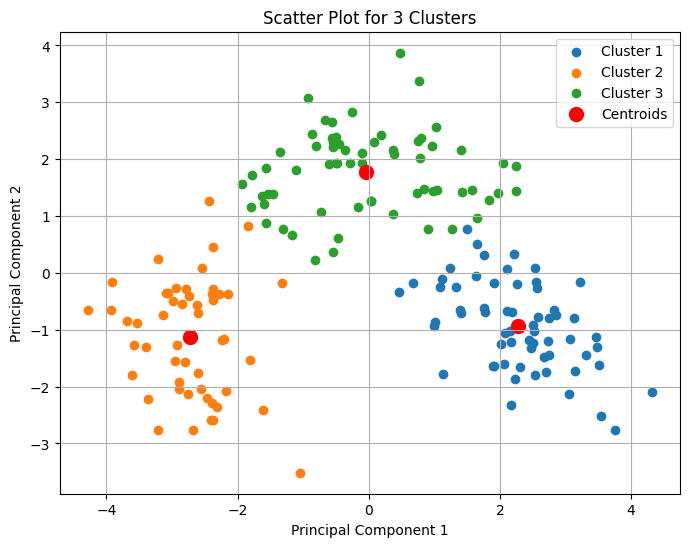

In [ ]:

# Plotting the scatter plot for the optimal clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_num_clusters):
    plt.scatter(x_pca[kmeans_labels == cluster, 0], x_pca[kmeans_labels == cluster, 1], label=f'Cluster {cluster + 1}')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title(f'Scatter Plot for {optimal_num_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

**AgglomerativeClustering**

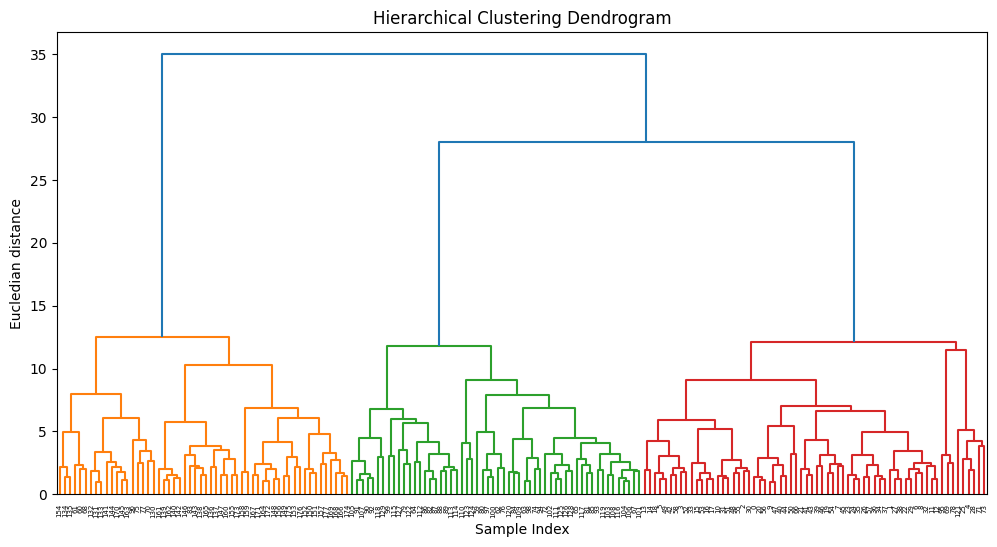

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Agglomerative Clustering to obtain linkage matrix
linkage_matrix = linkage(x_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian distance')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the range of cluster sizes to try
cluster_range = range(2, 11)
silhouette_scores = []

# Calculate silhouette score for each cluster size
for n_clusters in cluster_range:
    agg_model = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_model.fit_predict(x_pca)
    silhouette_avg = silhouette_score(x_pca, agg_labels)
    silhouette_scores.append(silhouette_avg)

# Find the maximum silhouette score and corresponding number of clusters
optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
max_silhouette_score = max(silhouette_scores)

print("Optimal number of clusters:", optimal_num_clusters)
print("Maximum silhouette score:", max_silhouette_score)


Optimal number of clusters: 3
Maximum silhouette score: 0.2839520778138407


In [ ]:
# Fit  agglomerative clustering model with the optimal number of clusters
agg_model = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_model.fit_predict(x_pca)


In [ ]:
agg_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

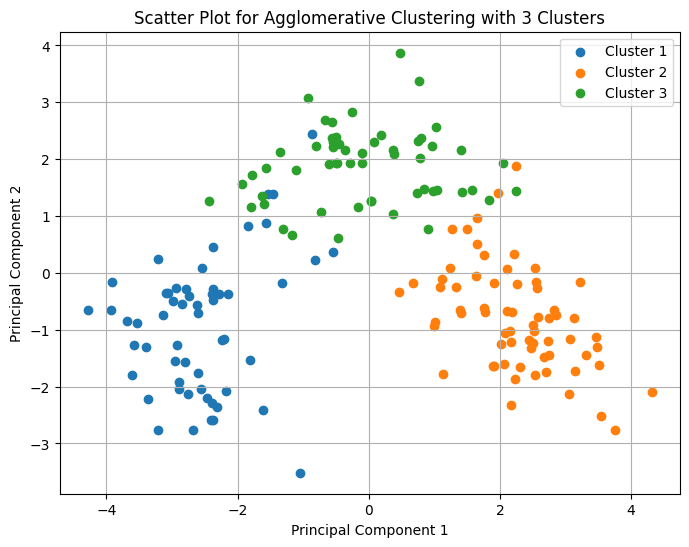

In [ ]:
# Plotting the scatter plot for Agglomerative Clustering
plt.figure(figsize=(8, 6))
for cluster in range(optimal_num_clusters):
    plt.scatter(x_pca[agg_labels == cluster, 0], x_pca[agg_labels == cluster, 1], label=f'Cluster {cluster + 1}')
plt.title(f'Scatter Plot for Agglomerative Clustering with {optimal_num_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics  import silhouette_score
sil=silhouette_score(x_pca,agg_labels)
print(sil)

0.2839520778138407


**DB SCAN Clustering**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Define expanded range of values for eps and min_samples
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5],
    'min_samples': [2, 3, 5, 7, 10, 15, 20]
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(x_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:  # Ensure at least one cluster is formed
        silhouette = silhouette_score(x_pca, labels)
        if silhouette > best_score:
            best_score = silhouette
            best_params = params

print("Best silhouette score:", best_score)
print("Best parameters:", best_params)


Best silhouette score: 0.2328240143667063
Best parameters: {'eps': 2.5, 'min_samples': 10}


In [ ]:
from sklearn.cluster import DBSCAN

# Create DBSCAN model with best parameters
best_dbscan = DBSCAN(eps=2.5, min_samples=10)

# Fit the model to the data
best_labels = best_dbscan.fit_predict(x_pca)


In [ ]:
# Get cluster labels and outliers
cluster_labels = best_dbscan.labels_
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_noise_points = list(cluster_labels).count(-1)

print("Cluster labels:", cluster_labels)
print("Number of clusters:", num_clusters)
print("Number of noise points:", num_noise_points)


Cluster labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  1  0  0  0  0  0  0 -1 -1  0 -1
  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0 -1  0  0  1  0
  0 -1 -1 -1 -1  0  0 -1  0  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]
Number of clusters: 2
Number of noise points: 24


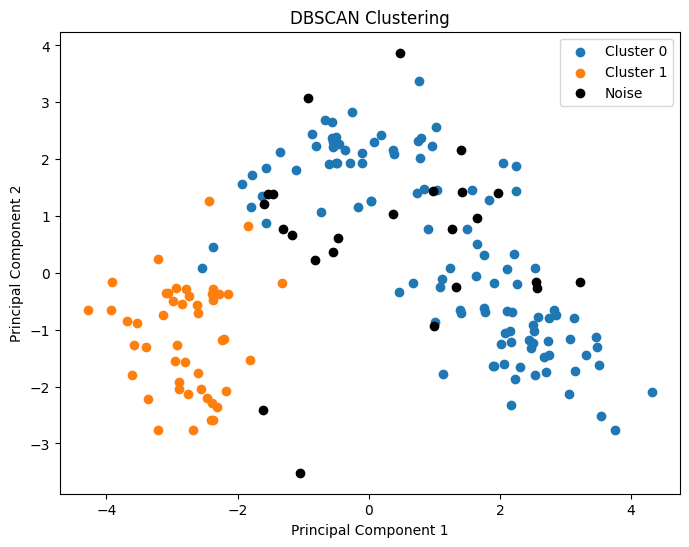

In [ ]:

# Plot clusters
plt.figure(figsize=(8, 6))
for label in set(cluster_labels):
    if label == -1:
        # Plot noise points in black
        plt.scatter(x_pca[cluster_labels == label][:, 0],
                    x_pca[cluster_labels == label][:, 1],
                    color='black', label='Noise')
    else:
        # Plot points belonging to each cluster with a different color
        plt.scatter(x_pca[cluster_labels == label][:, 0],
                    x_pca[cluster_labels == label][:, 1],
                    label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
